In [8]:
# Librerie
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
get_ipython().magic('pylab inline')

Populating the interactive namespace from numpy and matplotlib


In [9]:
dir_df = os.path.join(os.path.abspath(''),'stg')
dir_out = os.path.join(os.path.abspath(''),'output')

In [10]:
df_filename = r'df_tweets.pkl'
df_fullpath = os.path.join(dir_df, df_filename)
df_tweets = pd.read_pickle(df_fullpath)

### G1 - Sentiment Distribution

In [11]:
df_g1 = df_tweets[['sentiment','id']].groupby(['sentiment'],as_index=False).count()
df_g1

,sentiment,id
0,negative,278
1,neutral,1238
2,positive,165


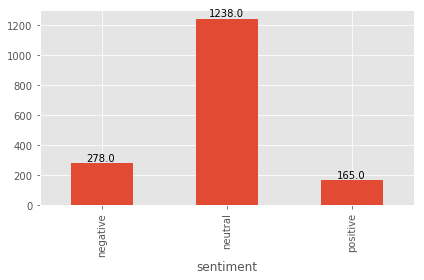

In [12]:
# Report
tp = df_g1.plot(
        x=df_g1['sentiment'],
        kind='bar',
        legend = False)
for p in tp.patches:
    tp.annotate(str(p.get_height()), 
                (p.get_x() * 1.005, p.get_height() * 1.005), 
                ha='center', va='center', xytext=(30, 5), textcoords='offset points')
    tp.plot()

fig_prj = tp.get_figure()
fig_prj.tight_layout()
fig_prj.savefig(os.path.join(dir_out,'sentiment_distr.png'), format='png', dpi=300)

### G2 - Instant of Sentiment

Trend looks like it tweet sentiment becomes ?? as time goes on

In [13]:
df_tweets.head(2)

,coord,created_at,id,location,place,text,timezone,sentiment,sentiment_compound
0,None,Thu May 11 20:44:26 +0000 2017,862770395853860864,Ireland,None,RT @2ALAW: 📣Hey Hillary The FBI Is Going To Re...,None,neutral,0.134
1,None,Thu May 11 20:44:26 +0000 2017,862770395992272896,None,None,He's a madman https://t.co/B2ltvqzop3 #trump #...,None,neutral,0.000


In [15]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
df_tweets['hour'] = pd.DatetimeIndex(df_tweets['created_at']).hour
df_tweets['date'] = pd.DatetimeIndex(df_tweets['created_at']).date
df_tweets['minute'] = pd.DatetimeIndex(df_tweets['created_at']).minute
df=(df_tweets.groupby('minute',as_index=False).sentiment_compound.mean())


In [16]:
df.count()

minute                21
sentiment_compound    21
dtype: int64

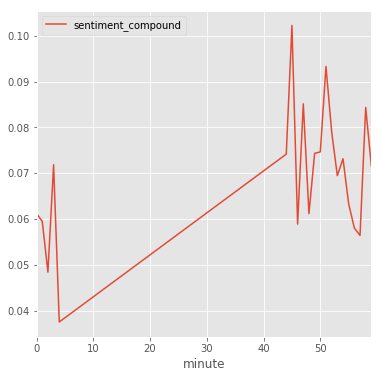

In [18]:
df.plot(x=df['minute'],y='sentiment_compound')

### G3 - Position of Sentiment

https://www.kaggle.com/solegalli/airline-sentiment-part-1

In [19]:
# Location exploration
df_tweets.location.unique()

array(['Ireland', None, 'Texas', 'California, USA', 'Asheville, NC',
       'citrus heights CA', 'Knoxville, TN', 'Malibu, CA, USA',
       'United States', 'Houston, TX', 'Everywhere, USA', 'M.I.A.',
       'Tampa, FL', 'USA a republic', 'SanDiego❤BayAreaCalifornia',
       'La Vega, Dominican Republic', 'Philadelphia, PA', 'Los Angeles',
       'Benirus Manor, Anvil', 'Wexford, Ireland',
       ' #WA 🌲 🦊 #AnimalLiberation', 'Scotland',
       "Snoop's House (Don't tell him)", 'Hallandale Beach',
       'Florida, USA', 'USA', 'United Kingdom', 'Little Canada, MN',
       'Tejas', 'UK', 'Rosedale, Louisiana', 'Düsseldorf, Germany',
       'Orange County, CA', 'Global ', 'Texas, USA', 'New York City',
       'Jackson, MS', 'Boston, Massachusetts', 'GREAT STATE Of TEXAS ❤️',
       'Everywhere', 'Cheektowaga NY USA ', 'Florida', '#blacklivesmatter',
       'Silver Spring, MD', 'Red Deer, Alberta', 'Proudly Indebted USofA',
       'Paris, France', 'Virginia, USA', 'Kecksburg, Pennsylvania

In [34]:
# Timezone analysis
df_t = df_tweets['timezone'].groupby(df_tweets['timezone']).agg(['count'])

In [39]:
df_t

,count
timezone,
Abu Dhabi,1
Adelaide,2
Alaska,1
America/Bahia_Banderas,1
America/Chicago,9
America/Denver,1
America/Detroit,1
America/Los_Angeles,1
America/New_York,8


In [ ]:
timezone = as.data.frame(prop.table(table(data$user_timezone)))
colnames(timezone) = c('timezone', 'Frequency')
timezone = timezone[order(timezone$Frequency, decreasing = TRUE),]
dim(timezone)
head(timezone, 10)

### G4 - World Cloud
from wordcloud import WordCloud,STOPWORDS

#visualization using wordcloud for the negative tweets
df=tweet[tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])
                                
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
                     
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()